<a href="https://colab.research.google.com/github/EuniceOnduso/worldBank_Gender_Visualization/blob/main/DSA_2024_Data_Visualization_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation Methods: an exploration of world gender statistics

This worksheet will help you understand the basics of creating visualisations in Python and data exploration. We will guide our learning using a very interesting dataset collected from [The World Bank data catalog](https://datacatalog.worldbank.org/search/dataset/0037654/Gender-Statistics).

We look into the gender statistics database for a comprehensive understanding of latest gender statistics covering demography, education, health, access to economic opportunities, public life and decision-making and agency. In doing this, we will learn how to create visualisations, but also try to understand deeper concerns about disparities and inequalities across the globe.

Our learning outcomes are as follows:

*   You will be able to explain what Matplotlib is and how is it helpful in creating visualisations
*   You will be able to implement basic visualisations using standard Python Libraries
*   You will be able to update and modify aesthetics of the visualisations

In this worksheet, we will use Google Colab, an interactive Python programming environment which allows us to embed text and code. You can copy the notebook to your own account and start using the code, or use this as a reference to write your own code in your own notebook or google colab page.

While Matplotlib and Seaborn offer versatile ways of visualising data, other tools such as Plotly, GeoPandas and Bokeh provide specialist visualisation needs. There are a large number of Python libraries that you can explore in your own time, but for this session, we will mainly focus on Matplotlib



#**Matplotlib**


Matplotlib is a comprehensive library for creating static, animated and interactive visualisations in Python and therefore, an excellent choice for generating scientific figures.

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general


## Installation

You'll need to install matplotlib first with either:

    conda install matplotlib
or

    pip install matplotlib
    


In [ ]:
import matplotlib.pyplot as plt

# How Matplotlib works

**Source:** Much of this content is taken from the very helpful Matplotlib.org pages and the [Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html) is a brilliant resource to help you get started.

Before we get into the plotting, it is helpful to read about how Matplotlib works. There are three layers to the Matplotlib API:


*   **FigureCanvas** - the area onto which the figure is drawn
*   **Renderer** - the object which knows how to draw on the FigureCanvas
*   **Artist** - the object that knows how to use a renderer to paint onto the canvas

The FigureCanvas and Renderer handle all the details of talking to drawing languages, while the Artist handles all the instructions of representing and laying out the figure, text and lines. Typically, we spend 95% of our time working with the Artists.

Matplotlib graphs your data on Figures (e.g. windows, Jupyter widgets etc.), each of which contain one or more Axes, an area where points are specified in terms of coordinates (x-y in a 2D plot, x-y-z in a 3D plot etc.). The simplest way of creating a Figure with an Axes is using `pyplot.subplots`. We can then use `Axes.plot` to draw some data on the Axes, and `show` to display the figure



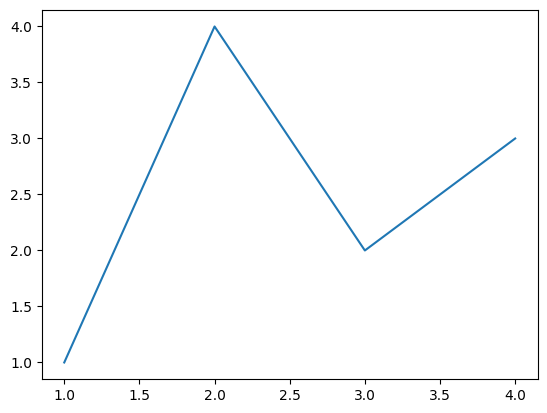

In [ ]:
# create a figure with a single subplot

fig, ax = plt.subplots() #create a figure containing a single Axis
ax.plot([1,2,3,4],[1,4,2,3]) #Plot some data on the axes
plt.show() #Show the figure

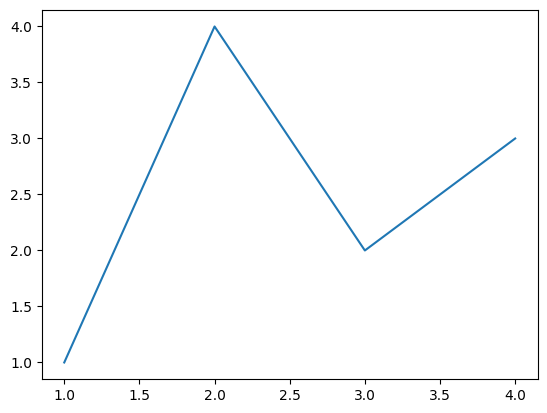

In [ ]:
# Or you could create the same plot by passing variables
x_data = [1,2,3,4]
y_data = [1,4,2,3]

plt.plot(x_data,y_data)
plt.show()

You will note that in the second example, we didn't use `plt.subplots()`. Instead, we use `plt.plot()`, which is a quick and easy way to plot data on the current data. Plot data implicitly creates a figure and an Axes. It is best for quick plots and simple use cases, btu becomes complicated when using complex grid of plots.  

# Different types of visualisations

We have only seen how to create axes, subplots, and figures. A figure is what keeps track of all the child Axes and this means that there is a hierarchy of all the different components of the figure. This is quite a long subject and I would encourage you to read more about [link text](https://)this at the Matplotlib Quick Start page referenced earlier.



So far we have been using a simple set of data and plotting it. Let's try to use more data and one of the best ways is to create a dataset of randomly generated numbers. For this, let's try to first import `numpy` and then create our visualisation

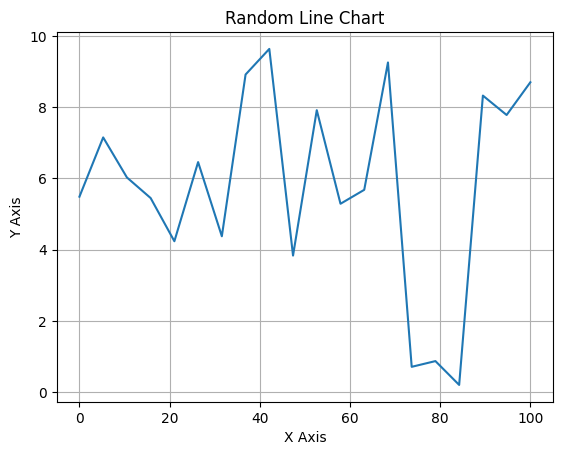

In [ ]:
import numpy as np

# Generate random dataset - x values will be equally spaced while y values will be randomly generated
np.random.seed(0)  # For reproducibility
x = np.linspace(0, 100, 20)  # 20 evenly spaced values from 0 to 10
y = np.random.random(20) * 10  # 20 random values scaled by 10

plt.plot(x, y)
plt.title('Random Line Chart')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True)
plt.show()


We can of course create other types of visualisations and for the data we have just created, we could also generate a bar chart and a scatterplot. We can create them and then add them to one figure using subplots.

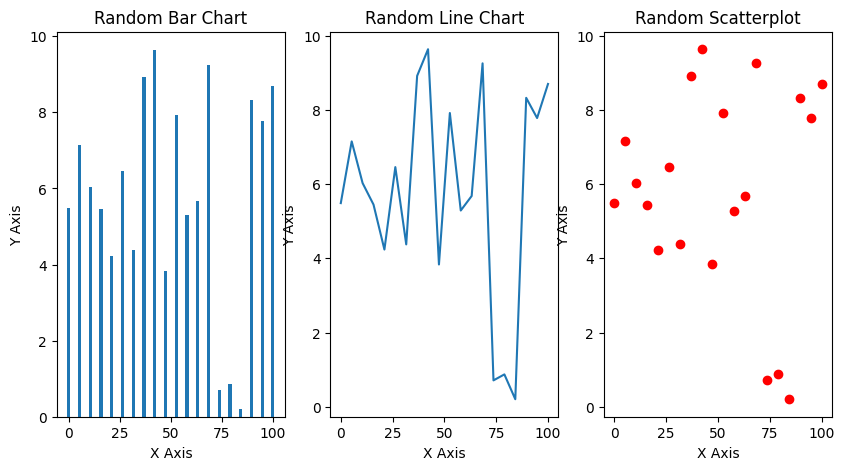

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5)) # subplots(1,3) indicates we would like to align the plots horizontally

# Bar chart
ax1.bar(x, y, 1.5)  #bar indicates a barchart and 1.5 indicates the bar width - try changing this value to see how the plots change
ax1.set_title('Random Bar Chart')
ax1.set_xlabel('X Axis')
ax1.set_ylabel('Y Axis')

# Line chart
ax2.plot(x, y)
ax2.set_title('Random Line Chart')
ax2.set_xlabel('X Axis')
ax2.set_ylabel('Y Axis')

#Scatter plot
ax3.scatter(x, y, marker='o', color='r')  #markers could be different shapes - https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers
ax3.set_title('Random Scatterplot')
ax3.set_xlabel('X Axis')
ax3.set_ylabel('Y Axis')

# Show the subplots
plt.show()



---


# Working with real data - World Gender Statistics

While the random datasets are great to learn how to create visualisations, it's always more exciting to look at real world data. For this, we will access one of the most popular datasets that allows us to conduct cross-country analyses - the World Bank Dataset. In particular, we will look at the Gender Statistics dataset, available at https://datacatalog.worldbank.org/search/dataset/0037654/Gender-Statistics

You can click on the 'Databank' to see the large number of features (1153 features), but for the sake of convenience, we have chosen an extract of only 8 features from this dataset, [available at this link](https://drive.google.com/file/d/1f-qBseU7kEPSmwDEcUPIFFkY648TL5YO/view?usp=sharing). This is a dataset that looks at the countries in Middle East & North Africa and Sub-Saharan Africa regions, over the last 15 years. The features we have chosen are as follows:
* Employers, female (% of female employment) and male (% of male employment) (modeled ILO estimate)
* Employment to population ratio, 15+, female and male (%) (modeled ILO estimate)
* GDP per capita (Current US$)
* Gross graduation ratio, primary, female and male (%)
* A woman can get a job in the same way as a man (1=yes; 0=no)

One of the reasons why we chose these features is that they have a high level of completeness, and there is very little missing data. Much of the other features have a lot of sparsity, which makes it difficult to visualise. This is one of the issues when working with real-world data - it's important to acknowledge this, and deal with data quality issues.

We would like to study how the countries have done according to these indicators, comparing the gender statistics. So, first, let's try loading this data into the Python environment. For this, we will import the `pandas` library






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_url = 'https://drive.google.com/file/d/1f-qBseU7kEPSmwDEcUPIFFkY648TL5YO/view?usp=sharing' # this is where we have stored our csv file - we need to make some changes to the file path to make it accessible
gender_data = 'https://drive.google.com/uc?export=download&id='+data_url.split('/')[-2]


gender_stats = pd.read_csv(gender_data, sep=',', encoding='utf-8', on_bad_lines='skip',index_col=False) #read the csv file from the location we provided
gender_stats.head() #prints the top few rows of our dataset




,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Algeria,DZA,1.54901175,1.510891632,1.470846098,1.671603524,1.882907279,1.908531544,1.963369223,1.974076968,1.963722524,1.950856942,1.927643415,1.883164068,1.887766803,1.839311509,..
1,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Angola,AGO,1.469131387,1.912291761,2.45752829,2.788587871,3.12760259,3.466660721,3.416735445,3.441454921,3.458326026,3.485549059,3.483300617,3.512207012,3.49477586,3.498733271,..
2,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Bahrain,BHR,1.999497539,2.176543418,2.161518292,2.175098672,2.168286572,2.193719939,2.213519603,2.331358919,2.394967476,2.461919433,2.502127177,2.548708788,2.569421998,2.872004138,..
3,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Benin,BEN,0.472525906,0.483349144,0.494552608,0.498037373,0.492779388,0.485022752,0.488530849,0.492317771,0.49158011,0.486681109,0.482436941,0.489376163,0.49241519,0.496703264,..
4,"Employers, female (% of female employment) (mo...",SL.EMP.MPYR.FE.ZS,Botswana,BWA,2.048127575,1.815242812,1.598674027,1.40162586,1.215620115,1.256277636,1.268173509,1.276453755,1.266917787,1.26097156,1.252982683,1.27728497,1.276663475,1.240929045,..


As we can see from the data, our dataset is rather large and each row contains an indicator and country, and columns are the values for every year since 2009. We can show how many indicators we have and the number of countries (which includes the Middle East). We also print the name of indicators we have in our dataset.

In [ ]:
data_length, indctr_names, cntry_codes = len(gender_stats), gender_stats['Series Name'].unique(), gender_stats['Country Code'].unique()

print("# of unique indicators: ", len(indctr_names))
print("# of unique countries: ", len(cntry_codes))


print(indctr_names)

# of unique indicators:  8
# of unique countries:  69
['Employers, female (% of female employment) (modeled ILO estimate)'
 'Employers, male (% of male employment) (modeled ILO estimate)'
 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)'
 'Employment to population ratio, 15+, male (%) (modeled ILO estimate)'
 'GDP per capita (Current US$)'
 'Gross graduation ratio, primary, female (%)'
 'Gross graduation ratio, primary, male (%)'
 'A woman can get a job in the same way as a man (1=yes; 0=no)']


Let's try to do some analysis of the GDP per capita data.

In [ ]:
gender_stats_GDP = gender_stats[gender_stats['Series Name'] == 'GDP per capita (Current US$)']
gender_stats_GDP.head()


,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
276,GDP per capita (Current US$),NY.GDP.PCAP.CD,Algeria,DZA,3898.478788,4495.921476,5473.281826,5610.733282,5519.777576,5516.22944,4197.419985,3967.200647,4134.936087,4171.790388,4021.983266,3354.153164,3700.314697,4342.637968,..
277,GDP per capita (Current US$),NY.GDP.PCAP.CD,Angola,AGO,3123.698898,3586.66368,4608.155166,5083.826851,5061.34924,5011.984412,3217.339244,1809.709377,2439.374441,2540.508878,2191.347764,1450.905112,1927.474078,3000.444231,..
278,GDP per capita (Current US$),NY.GDP.PCAP.CD,Bahrain,BHR,19448.18326,21186.81433,23741.55746,25102.72635,25790.73031,25464.7601,22795.44886,22867.18112,24349.90987,25415.84662,25869.11291,23433.18724,26850.00339,30146.92503,..
279,GDP per capita (Current US$),NY.GDP.PCAP.CD,Benin,BEN,1061.71836,1009.489495,1099.414311,1112.569536,1214.295565,1251.504765,1041.652523,1049.820303,1095.274459,1194.438214,1170.885995,1240.733155,1360.911474,1302.851036,..
280,GDP per capita (Current US$),NY.GDP.PCAP.CD,Botswana,BWA,4938.249906,6041.732051,7080.778643,6392.987347,6436.603319,6844.03325,5869.737579,6411.551666,6705.341062,6947.817841,6691.161053,5875.070606,7238.796098,7738.878804,..


This shows that we have now created a new dataframe called gender_stats_GDP, which has all the countries of interest and shows the values of the GDP per capita for the previous 15 years. Inspecting the values, it looks like the year 2023 is empty so we will only consider values upto 2022. Let's try to create a barchart for all our countries with the 2022 data.

<ipython-input-10-659b4b8c1d45>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_stats_GDP["2022 [YR2022]"] = pd.to_numeric(gender_stats_GDP["2022 [YR2022]"],errors='coerce') #we need to convert the 2022 column to numeric


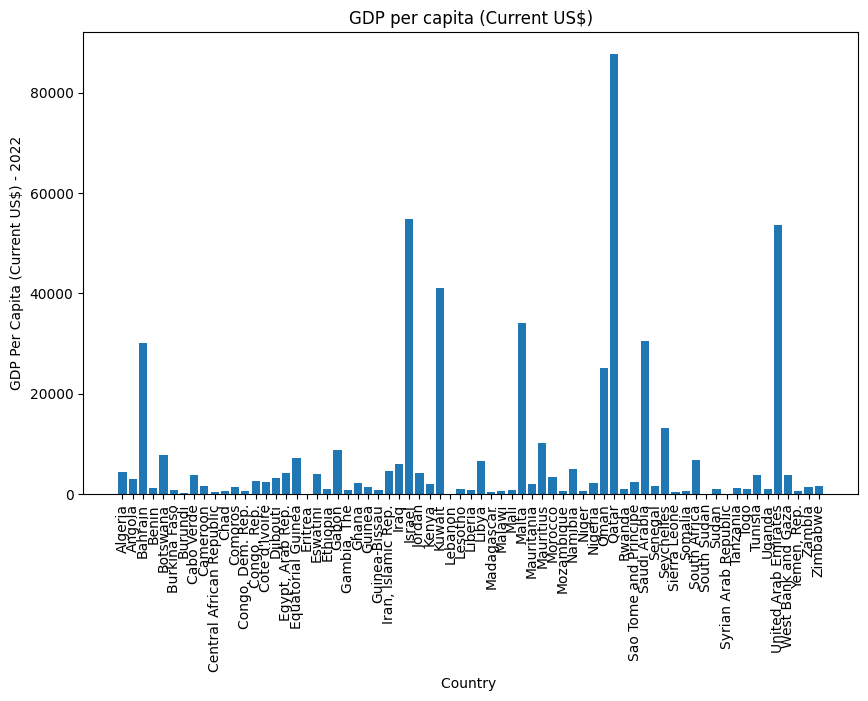

In [ ]:
gender_stats_GDP["2022 [YR2022]"] = pd.to_numeric(gender_stats_GDP["2022 [YR2022]"],errors='coerce') #we need to convert the 2022 column to numeric

# Create the bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(gender_stats_GDP['Country Name'], gender_stats_GDP['2022 [YR2022]'])  # Create bars for each fruit with corresponding count
plt.xlabel('Country ')  # Label the x-axis
plt.ylabel('GDP Per Capita (Current US$) - 2022')  # Label the y-axis
plt.title('GDP per capita (Current US$)')  # Add a title to the chart
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Display the chart
plt.show()

Let's try to look at one country (kenya) and try to study how the GDP has changed over the years. A perfect visualisation for this would be to use a trendline. But first we need to convert all the year columns to numeric

In [ ]:
gender_stats_GDP[['2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
                  '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
                  '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                  '2021 [YR2021]', '2022 [YR2022]']] = gender_stats_GDP[['2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
                  '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
                  '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                  '2021 [YR2021]', '2022 [YR2022]']].apply(pd.to_numeric, errors='coerce')



<ipython-input-11-546697acd592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_stats_GDP[['2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',


In [ ]:
years = ['2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
                  '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
                  '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                  '2021 [YR2021]', '2022 [YR2022]']

country ='Kenya'

GDPvaluesCountry = gender_stats_GDP.loc[gender_stats_GDP['Country Name']==country,years]
GDPvaluesCountry

,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022]
306,1049.121794,1093.639624,1099.315465,1289.780791,1376.829205,1489.919721,1496.653573,1562.076619,1675.988422,1845.783414,1970.08007,1936.250755,2069.661129,2099.301938


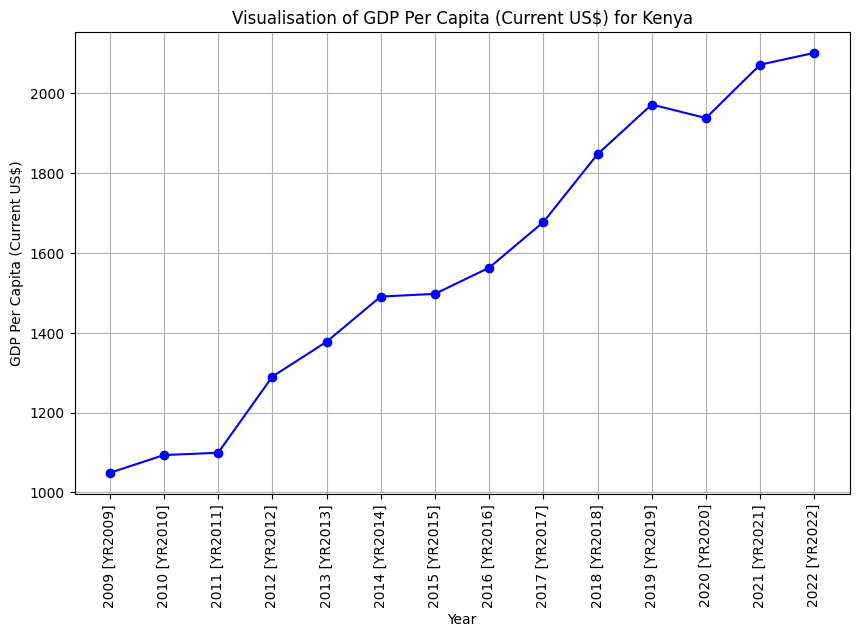

In [ ]:
# Plot the timeline
plt.figure(figsize=(10, 6))
plt.plot(years, GDPvaluesCountry.iloc[0], marker='o', linestyle='-', color='b')   #here we use iloc[0] to find the first row of the GDPvalues dataframe

# Add labels and title
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('GDP Per Capita (Current US$)')
plt.title('Visualisation of GDP Per Capita (Current US$) for ' + country)

# Optionally, add gridlines
plt.grid(True)

# Show plot
plt.show()

Now we have the GDP per capita plot for a given country.

**Exercise 1:** You can try changing the country and by changing the value of the `country` variable. Can you look at the graphs for Ghana, Libya, Uganda and South Africa?


Now let's try to join these plots of different countries in one visualisation - this allows us to compare the countries a bit better. We take the same approach as the previous time, but add different colours.





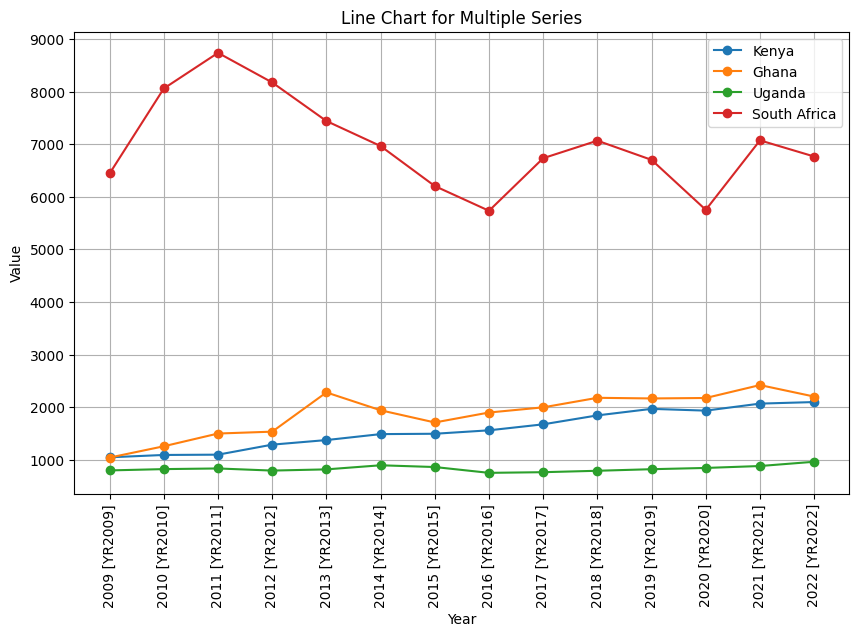

In [ ]:
compareCountries = ['Kenya', 'Ghana', 'Uganda', 'South Africa']   #you can change the countries and add your own countries
numCountries = len(compareCountries)

# Plot the line chart for multiple series
plt.figure(figsize=(10, 6))

# Plot each series
for country in compareCountries:
    GDPval = gender_stats_GDP.loc[gender_stats_GDP['Country Name']==country,years]
    plt.plot(years, GDPval.iloc[0], marker='o', linestyle='-', label=country)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.title('Line Chart for Multiple Series')
plt.legend()  # Add legend to distinguish series

# Optionally, add gridlines
plt.grid(True)

# Show plot
plt.show()

# Studying gender data

So far, we have only studied the GDP data, but now let's try to study the gender component of our data. Before we proceed, let's try to convert all the year columns to numeric so that it's easier for us to analyse the dataset.

You may recall doing this in one of the previous steps beore - we just apply the same method to the entire gender_stats dataframe

In [ ]:
gender_stats[['2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
                  '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
                  '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                  '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']] = gender_stats[['2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]',
                  '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]',
                  '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]',
                  '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]']].apply(pd.to_numeric, errors='coerce')


Let's focus on a specific country context, Kenya and look at one of the simple features, 'A woman can get a job in the same way as a man (1=yes; 0=no)'. This is a simple feature since values for each year and country is represented in binary (0 or 1). Let's load the data into another dataframe first - just like the last time

In [ ]:
JobSameAsMan = gender_stats[gender_stats['Series Name'] == 'A woman can get a job in the same way as a man (1=yes; 0=no)']
JobSameAsMan.head()


,Series Name,Series Code,Country Name,Country Code,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
483,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,Algeria,DZA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
484,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,Angola,AGO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
485,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,Bahrain,BHR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,Benin,BEN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
487,A woman can get a job in the same way as a man...,SG.GET.JOBS.EQ,Botswana,BWA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


if we inspect the data, we will note that there has been very little change overt the years, so we will only look at the latest data - this time, 2023. First, let's see how many countries fall in either categories

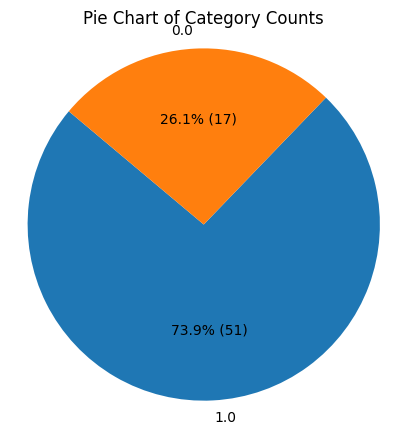

In [ ]:
# Get value counts of column 'Category'
category_counts = JobSameAsMan['2023 [YR2023]'].value_counts()

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct=lambda pct: f'{pct:.1f}% ({int(pct/100*sum(category_counts))})', startangle=140)
plt.title('Pie Chart of Category Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

We see that majority of the countries are recorded as countries where a woman can get a job in the same way as a man. Let's try to go a bit deeper, and see if we can find which countries belong to which category:

In [ ]:
filtered_rows = JobSameAsMan[JobSameAsMan['2023 [YR2023]'] == 0] #change 0 to 1 to see the countries that have a positive indicator
print(filtered_rows['Country Name'])

485                 Bahrain
491                Cameroon
493                    Chad
494                 Comoros
499        Egypt, Arab Rep.
500       Equatorial Guinea
502                Eswatini
508           Guinea-Bissau
509      Iran, Islamic Rep.
512                  Jordan
514                  Kuwait
523              Mauritania
528                   Niger
531                   Qatar
541                   Sudan
542    Syrian Arab Republic
548      West Bank and Gaza
549             Yemen, Rep.
Name: Country Name, dtype: object


Let's try to visualise this data on a map. For this we will need to create an object that only contains the value for 2023, and can be easily referenced with country names.

In [ ]:
JobSameAsManCountries={}
for country in JobSameAsMan['Country Name']:
  JobSameAsManCountries[country]=(JobSameAsMan[JobSameAsMan['Country Name']==country]['2023 [YR2023]'].iloc[0])  #we use iloc[0] to get the value of the field reference. Otherwise python returns a dataframe structure


In order to visualise the data, we will need to use a library called geopandas and we will download the map of Africa. This will be downloading the geographical descriptions of all the countries in Africa from the Natural Earth webservice, but this might create some warning messages - please ignore this for now. Ideally, you would need to download these descriptions to a local folder and then access the file from there.

<ipython-input-20-8ce2fcc85661>:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


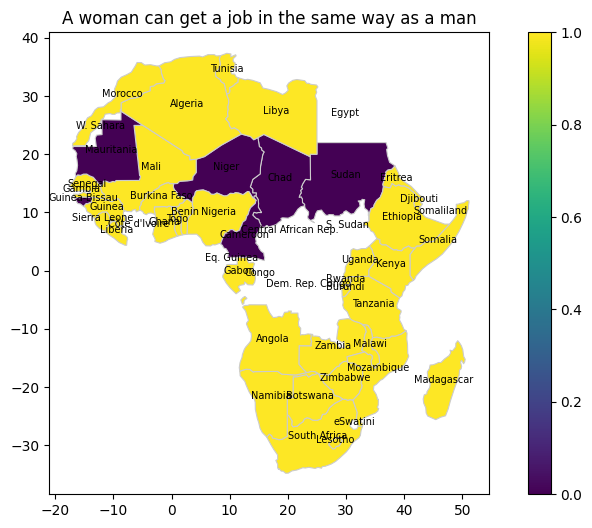

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the world map to include only African countries
africa = world[world['continent'] == 'Africa']
africa['Job Same As Man'] = africa['name'].map(JobSameAsManCountries)  #here we try to use the map function from Pandas to map the values from the JobSameAsManCountries


# Plot the Africa map with data from the newly created column
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
africa.plot(column='Job Same As Man', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add country names to the plot
for idx, row in africa.iterrows():
    plt.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], ha='center', color='black', fontsize=7)

# Add colorbar
cbar = ax.collections[0].colorbar


# Show the plot
plt.title('A woman can get a job in the same way as a man')
plt.show()

This map is interesting because we can see where we have missing data. This means that even though the World Bank data is an excellent resource, sometimes we have to deal with missing data. This could also be caused because in some datasets, the country names are different, and here we are only trying to map exact occurences of country names.

Now that we can visualise a simple boolean feature, let's try to work with some more interesting data. For this, let's look at another feature, Employment to population ratio, 15+, female (%) (modeled ILO estimate) and compare that withEmployment to population ratio, 15+, male (%) (modeled ILO estimate).

As before, we will need to create a more manageable datafrme. This time,
 we will create two dataframes so that we can compare the male vs female scores for the entire set of countries.



In [ ]:
#here we prepare our two main datasets - one each for male and female

#first, we get the data from the indicator about the female employment to population ratio

FemaleEmplData = gender_stats[gender_stats['Series Name'] == 'Employment to population ratio, 15+, female (%) (modeled ILO estimate)']
FemaleEmplCountries={}


for country in FemaleEmplData['Country Name']:
  FemaleEmplCountries[country]=(FemaleEmplData[FemaleEmplData['Country Name']==country]['2023 [YR2023]'].iloc[0])  #we use iloc[0] to get the value of the field reference. Otherwise python returns a dataframe structure

#now, let's get the data from the indicator about the male employment to population ratio
MaleEmplData = gender_stats[gender_stats['Series Name'] == 'Employment to population ratio, 15+, male (%) (modeled ILO estimate)']
MaleEmplCountries={}

for country in MaleEmplData['Country Name']:
  MaleEmplCountries[country]=(MaleEmplData[MaleEmplData['Country Name']==country]['2023 [YR2023]'].iloc[0])  #we use iloc[0] to get the value of the field reference. Otherwise python returns a dataframe structure

africa['Female Empl'] = africa['name'].map(FemaleEmplCountries)
africa['Male Empl'] = africa['name'].map(MaleEmplCountries)


/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
africa

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Job Same As Man,Female Empl,Male Empl
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",1.0,74.457,84.436
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...",NaN,NaN,NaN
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...",1.0,15.896,39.418
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",1.0,66.829,72.452
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",0.0,18.357,57.517
15,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084...",0.0,48.241,71.362
25,58558270.0,Africa,South Africa,ZAF,351431,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",1.0,36.400,47.227
26,2125268.0,Africa,Lesotho,LSO,2376,"POLYGON ((28.97826 -28.95560, 29.32517 -29.257...",1.0,46.922,62.402
48,14645468.0,Africa,Zimbabwe,ZWE,21440,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151...",1.0,54.645,66.241


We already have the Africa map from the previous section, so we will just reuse the same structure and append the new data to this dataframe

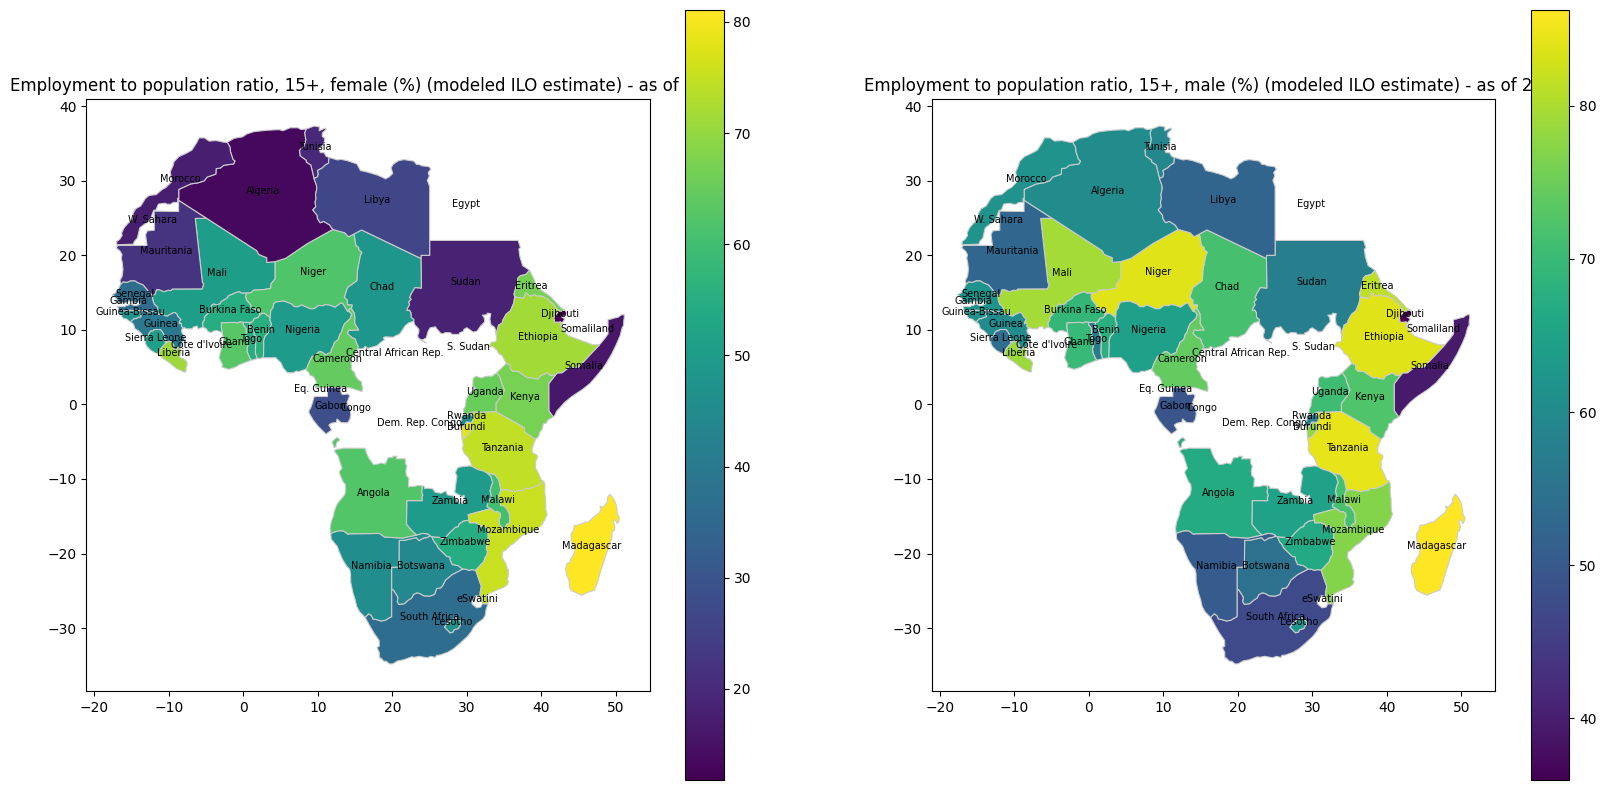

In [ ]:

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the first map
africa.plot(column='Female Empl', cmap='viridis', linewidth=0.8, ax=ax1, edgecolor='0.8', legend=True)
ax1.set_title('Employment to population ratio, 15+, female (%) (modeled ILO estimate) - as of 2023')
for idx, row in africa.iterrows():
    ax1.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], ha='center', color='black', fontsize=7)

# Plot the second map
africa.plot(column='Male Empl', cmap='viridis', linewidth=0.8, ax=ax2, edgecolor='0.8', legend=True)
ax2.set_title('Employment to population ratio, 15+, male (%) (modeled ILO estimate) - as of 2023')
for idx, row in africa.iterrows():
    ax2.annotate(text=row['name'], xy=row['geometry'].centroid.coords[0], ha='center', color='black', fontsize=7)

# Show the plot
plt.show()


What kind of observations do you have? I suppose the most prominent one is that the scales are different for the two maps. This can offer an insight that the overall figures indicate that all throughout, employment to population for females is lower - particularly when we are looking at the West African region.

We could look to explore this difference further - and another good way of doing this is by using a stacked barchart. These are very simple barcharts but allow for like-for-like comparisons, particularly when we are looking at comparing percentages.

In [ ]:
countries = africa['name']
female = africa['Female Empl']
male = africa['Male Empl']

<ipython-input-25-801d5c3fd0a5>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(countries, rotation=90)


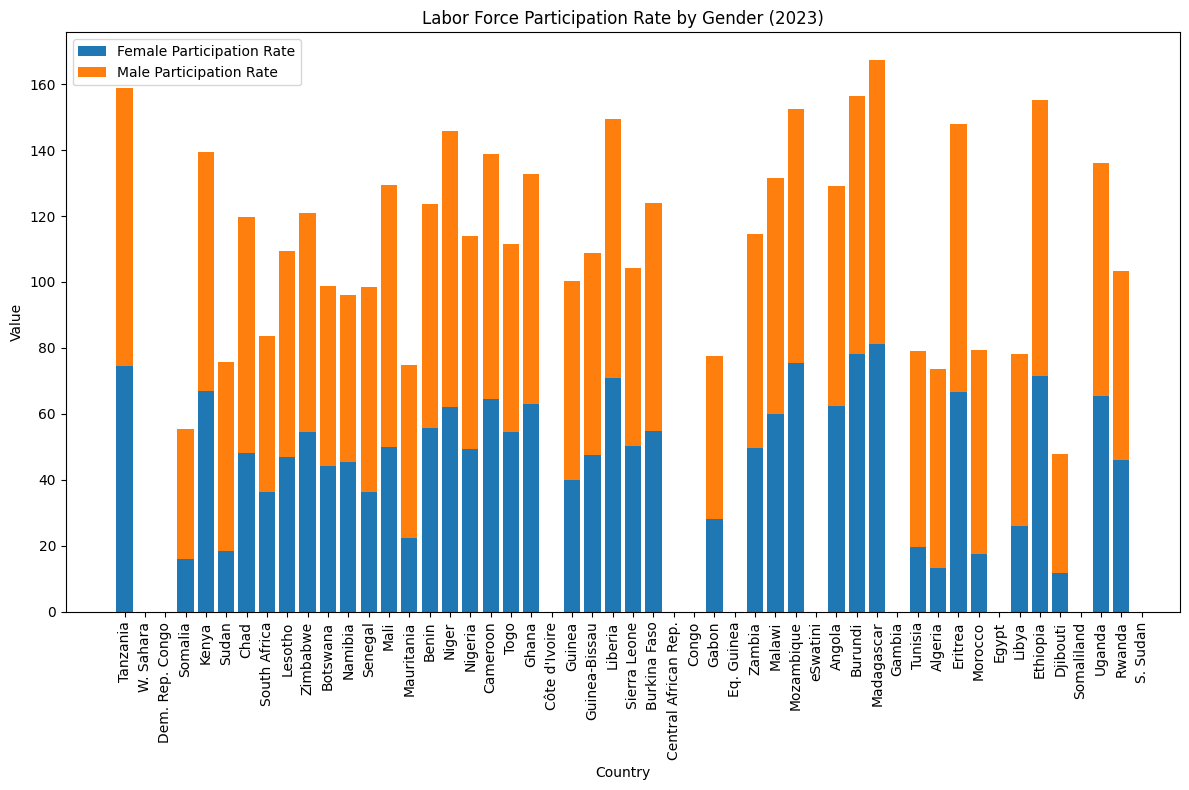

In [ ]:
# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.8

bar1 = plt.bar(countries, female, bar_width, label='Female Participation Rate')
bar2 = plt.bar(countries, male, bar_width, bottom=female, label='Male Participation Rate')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Labor Force Participation Rate by Gender (2023)')

ax.set_xticklabels(countries, rotation=90)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()